# Module 12 Challenge

### Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Set up Splinter
browser = Browser('chrome')

#### Step 1: Visit the news site
Use automated browser to visit the Mars temperature data site and inspect the page to identify which elements to scrape. 

In [4]:
# Visit the weather website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

#### Step 2: Scrape the table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [5]:
# Parse the website
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Find the table
table = soup.find('table', class_="table")

# Store the rows of data
table_body = table.find('tbody')

#### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame with column headings matching those on the website.

In [7]:
# Create list of headings
headings = table_body.find_all('th')
heading_list = []
for th in headings:
    heading_list.append(th.get_text().strip())

In [8]:
# Store all data rows
rows = table_body.find_all('tr', class_='data-row')

# Create list of list of data rows
data = []

for row in rows:
    data_list = []
    row_data = row.find_all('td')
    for td in row_data:
        data_list.append(td.text)
    data.append(data_list)

In [9]:
# Create a Pandas DataFrame using list of data and list of headings
mars_df = pd.DataFrame(data, columns = heading_list)

# Confirm DataFrame was created successfully
mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
# Close the browser
browser.quit()

#### Step 4: Prepare the data for analysis

Examine the data types that are currently associated with each column. Cast the data to the appropriate `datetime`, `int`, or `float` data types.

In [11]:
mars_df.info()

# Everything is an object. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [12]:
# Change id to integer
mars_df["id"] = mars_df["id"].astype(int)

# Change date to datatime
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

# Change sol(martian day) to integer
mars_df["sol"] = mars_df["sol"].astype(int)

# change ls(solar longitude) to integer
mars_df["ls"] = mars_df["ls"].astype(int)

# Change month (Martian month) to integer
mars_df["month"] = mars_df["month"].astype(int)

# Change min_temp to float
mars_df["min_temp"] = mars_df["min_temp"].astype(float)

# Change pressure to float
mars_df["pressure"] = mars_df["pressure"].astype(float)

In [13]:
# Check datatypes to ensure everything is correct
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


#### Step 5: Analyze the Data

Use the dataset to answer the following questions: 

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [16]:
# 1. How many months are there on Mars?
months = mars_df["month"].nunique()
print(f"There are {months} months on Mars.")

There are 12 months on Mars


In [18]:
# 2. How many Martian days' worth of data are there?
count_days = mars_df["sol"].count()
print(f"There are {count_days} days of data. ")

There are 1867 days of data. 


In [21]:
# 3. What is the average low temperature by month?
avg_min_temp = mars_df.groupby("month")["min_temp"].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<Axes: xlabel='Month', ylabel='Average Minimum Temperature (°C)'>

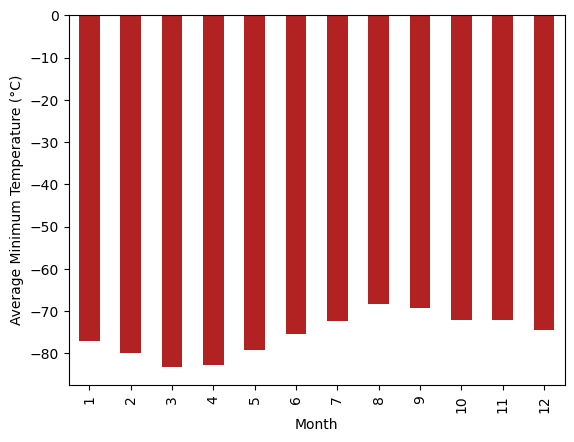

In [25]:
# Plot the average temperature by month
avg_min_temp.plot(kind = "bar", ylabel = "Average Minimum Temperature (°C)", xlabel = "Month", color = "firebrick")

<Axes: xlabel='Month', ylabel='Average Minimum Temperature (°C)'>

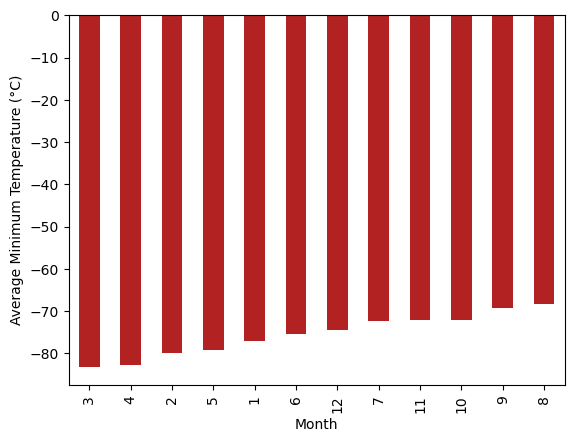

In [26]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avg_temp = avg_min_temp.sort_values()
sorted_avg_temp.plot(kind = "bar", ylabel = "Average Minimum Temperature (°C)", xlabel = "Month", color = "firebrick")

On average, the third month has the coldest minimum temperature on Mars at around -83°C, and the eighth month is the warmest at a balmy -68°C.

In [27]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby("month")["pressure"].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


<Axes: xlabel='Month', ylabel='Average Pressure'>

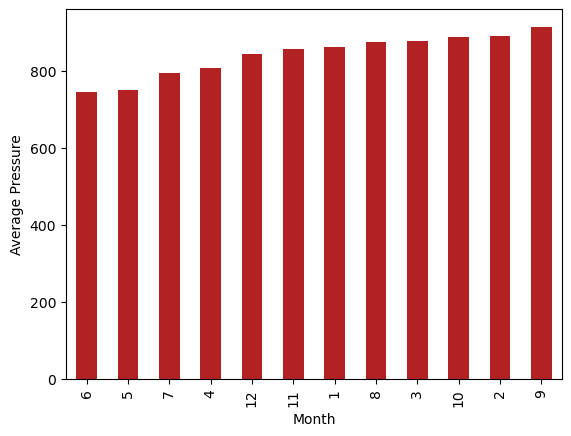

In [28]:
# Plot average pressure
sorted_pressure = avg_pressure.sort_values()
sorted_pressure.plot(kind = "bar", ylabel = "Average Pressure", xlabel = "Month", color = "firebrick")

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

<Axes: xlabel='Number of Terrestrial days', ylabel='Average Minimum Temperature (°C)'>

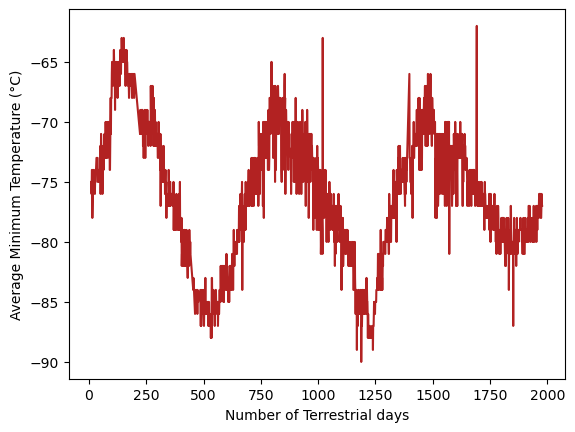

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df.plot(x= "sol", y="min_temp", ylabel = "Average Minimum Temperature (°C)", xlabel = "Number of Terrestrial days",
            color = "firebrick", legend = False)

The distance from peak to peak is roughly 805-130, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

#### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
# Specify the file path to save the CSV file
csv_path = 'Output/mars_data.csv'

# Write the DataFrame to the CSV file
mars_df.to_csv(csv_path, index=False) 